# Analyse des Einsatzes von Erschließungsstrategien beim Lesen

Am 2. 3. 2018 wurden an der Universität Valencia in zwei DaF-Gruppen (A2, B2) Daten zum wahrgenommenen Strategieneinsatz der Lernenden bei der Bearbeitung einer Aufgabe zum Lesen und Verstehen des neuen Wortschatzes erhoben.
Die Studierenden wurden gebeten, beim Lesen eines Textes aus dem Lehrwerk zunächst alle für sie neuen Wörter zu markieren (unabhängig von deren Verständnis). Nach einem zweiten Lesedurchgang sollten sie diese in eine Liste eintragen und angeben, welche Strategien sie angewendet hätten, um deren Bedeutung zu erkennen. 
Ein Teil der Lernenden hatte zuvor (freiwillig) an der Befragung zum Thema Erschließungsstrategien für unbekannten Wortschatz im Deutschen durch Lernende an spanischen Universitäten teilgenommen (siehe: http://diarium.usal.es/martinakienberger/200-2/?lang=de). Für alle Studierenden wurde kurz das Thema erklärt und Beispiele für Strategien gegeben. 

### Vorbereitung - Datenreinigung

In [57]:
import pandas as pd
import numpy as np
from sklearn.utils.extmath import randomized_svd
from sklearn.cluster import KMeans, AgglomerativeClustering
from adjustText import adjust_text
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [58]:
Rohdaten = pd.read_excel('D:\Daten\DISS\Daten\Salamanca.xlsx')

In [59]:
Rohdaten.head(3)

,Grupo,ID_alumno,Encuesta,Palabra,Estrategia_1,Estrategia_2,Estrategia_Esp_1,Estrategia_Esp_2,Comentario
0,A2.1,1,1,wärmsten,Dicc,NaN,NaN,NaN,NaN
1,A2.1,1,1,Chefsekretärin,Dicc,Con,Trad,NaN,NaN
2,A2.1,1,1,Speditionsunternehmen,Dicc,Con,Trad,NaN,NaN


In [60]:
Daten = Rohdaten

In den beiden Gruppen aus Salamanca mussten keine Teilnehmer von der Analyse ausgeschlossen werden.

#### Auswahl der für die Analyse relevanten Teile der Erhebung

In [61]:
cols = ['Grupo','ID_alumno','Encuesta','Palabra','Estrategia_1','Estrategia_2']

In [62]:
data = Daten[cols]

In [63]:
data.loc[8]

Grupo             A2.1
ID_alumno            1
Encuesta             1
Palabra         Damals
Estrategia_1      Dicc
Estrategia_2       NaN
Name: 8, dtype: object

Weitere erfasste Informationen dienten einerseits zur Entscheidung für Aufnahme in oder Ausschluss aus der Analyse und können andererseits für spätere, detaillierte Analysen herangezogen werden.

## Analyse des Strategieneinsatzes

##### Unterteilung der beiden Gruppen

In [64]:
A2 = data[data.Grupo == 'A2.1']

In [65]:
B1 = data[data.Grupo == 'B1.2']

### Gruppe A2

23 Teilnehmer

(4 hatten an Online-Befragung teilgenommen, 13 nicht, 6 keine Angabe)

In [66]:
print(r'Teilnehmer: ' + str(len(A2.ID_alumno.unique()))+'\n'+
      r'TN + Online-Befragung: ' + str(len(A2[A2.Encuesta == 1].ID_alumno.unique()))+'\n'+
      r'TN - Online-Befragung: ' + str(len(A2[A2.Encuesta == 2].ID_alumno.unique()))+'\n'+
      r'TN ? Online-Befragung: ' + str(len(A2[A2.Encuesta == 0].ID_alumno.unique())))

Teilnehmer: 23
TN + Online-Befragung: 4
TN - Online-Befragung: 13
TN ? Online-Befragung: 6


#### Als "neu" identifizierte Wörter (A2)

In [67]:
len(A2.Palabra.unique())

68

68 unterschiedliche Wörter wurden von den Lernenden als für sie "neu" angegeben. Bei der Datenübertragung von den Aufgabenblättern in Excel wurden orthographische Fehler berichtigt. Die Wörter wurden in der jeweiligen Schreibung des Originaltextes aus dem Lehrbuch übernommen (auch wenn die Lernenden teilweise stattdessen eine andere Form, z.B. Infinitiv, angaben).

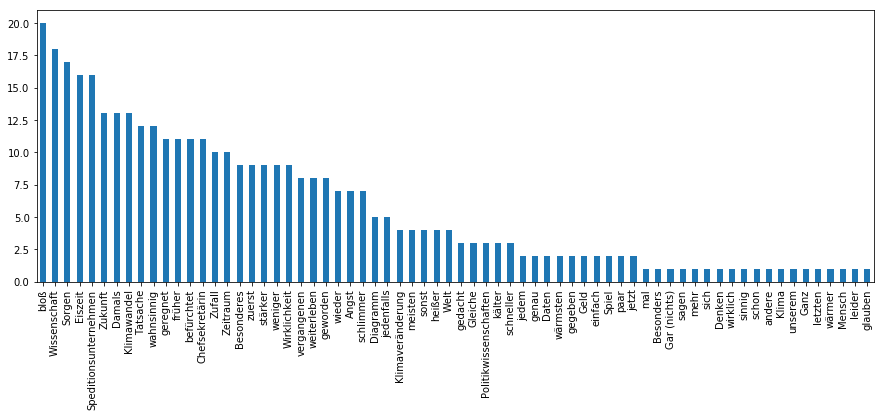

In [68]:
A2.Palabra.value_counts().plot(kind = 'bar', figsize = (15,5));

#### Kreuztabelle Studenten - neue Wörter (A2)

In [69]:
Al_Pal_A2 = pd.crosstab(A2.ID_alumno, A2.Palabra, margins = True)

In [70]:
Al_Pal_A2.T.head()

ID_alumno,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,All
Palabra,,,,,,,,,,,,,,,,,,,,,
Angst,0,1,1,0,0,1,0,0,0,0,...,1,0,1,1,0,1,0,0,0,7
Besonderes,0,1,0,0,1,1,0,0,0,0,...,1,1,1,0,1,1,0,0,0,9
Besonders,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Chefsekretärin,1,0,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,1,1,0,11
Damals,1,1,1,1,0,1,0,0,1,0,...,0,0,0,1,1,0,1,0,1,13


##### Histogramm

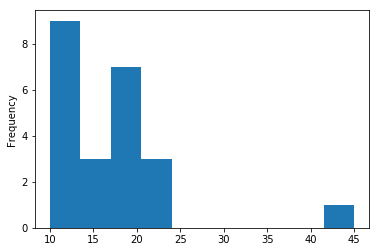

In [73]:
A2.ID_alumno.value_counts().plot(kind = 'hist',
                                bins = 10);

Das Histogramm zeigt die Frequenz der Wortanzahl pro TN - keine Normalverteilung in diesem Fall.

Ein Student stellt mit 45 als neu identifizierten Wörtern eine Ausnahme dar.

In [72]:
print(r'Minimum der als "neu" identifizierten Wörter: '+str(A2.ID_alumno.value_counts().min()) + '\n' +
      r'Maximum der als "neu" identifizierten Wörter: '+str(A2.ID_alumno.value_counts().max()))

Minimum der als "neu" identifizierten Wörter: 10
Maximum der als "neu" identifizierten Wörter: 45


In [71]:
print(r'Durchschnittlich als "neu" identifizierte Wortanzahl: '+str(Al_Pal_A2['All'][:-1].mean()))

Durchschnittlich als "neu" identifizierte Wortanzahl: 16.869565217391305


In [100]:
A2_1 = A2[A2.ID_alumno != 20].reset_index(drop = True)

In [102]:
Al_Pal_A2_1 = pd.crosstab(A2_1.ID_alumno, A2_1.Palabra, margins = True)

In [103]:
print(r'Durchschnittlich als "neu" identifizierte Wortanzahl: '+str(Al_Pal_A2_1['All'][:-1].mean()))

Durchschnittlich als "neu" identifizierte Wortanzahl: 15.590909090909092


Durchschnittlich wurden ca. 16 Wörter als "neu" identifiziert (17 unter Berücksichtigung von ID 20). Große Schwankungsbreite: zwischen 10 und 45 (siehe oben).

#### Einsatz von Erschließungsstrategien (A2)

Die freien Angaben der Lernenden wurden den Hauptkategorien aus der Online-Befragung zu Erschließungsstrategien zugeordnet und entsprechend in Excel erfasst:

* L1 = Descubro el significado o la función de palabras nuevas en alemán gracias a mi lengua materna. (Ich erschließe die Bedeutung oder Funktion unbekannter deutscher Wörter mit Hilfe meiner Muttersprache.)
* LE = Descubro el significado o la función de palabras nuevas en alemán con la ayuda de otras lenguas. (Ich erschließe unbekannte Wörter mit Hilfe anderer Sprachen.)
* AL = Utilizo mis conocimientos de alemán, p. ej. otras palabras conocidas, clases de palabras o la formación de palabras compuestas. (Ich nutze mein Wissen über das Deutsche, z.B. andere bekannte Wörter, Wortarten oder Kompositabildung.)
* Con = Utilizo información extraída del contexto, p. ej. la posición de una palabra en la frase o el formato del texto. (Ich nutze Informationen aus dem Kontext, z.B. die Position eines Wortes im Satz oder die Gestaltung des Textes.)
* Prof = Pido ayuda a mi profesor/a. (Ich bitte meinen Lehrer/meine Lehrerin um Hilfe.)
* Co = Pido ayuda a mis compañeros/as de clase. (Ich bitte die anderen Kursteilnehmer/innen um Hilfe.)
* Dicc = Consulto un diccionario u otra fuente (en papel o digital). (Ich konsultiere ein Wörterbuch oder eine andere Quelle (Printversion oder digital).)

In [74]:
v1 = A2.Estrategia_1.value_counts()
v2 = A2.Estrategia_2.value_counts()

In [75]:
v = v1 + v2
v['Co'] = v1['Co']
v

AL       81.0
Co       14.0
Con      85.0
Dicc    163.0
L1       15.0
LE       11.0
Prof      8.0
dtype: float64

In [76]:
v.sort_values(ascending = False)

Dicc    163.0
Con      85.0
AL       81.0
L1       15.0
Co       14.0
LE       11.0
Prof      8.0
dtype: float64

Da die Angaben einiger Studierender zwei Strategien zugeordnet werden können, müssen die Nennungen für die Gesamtauswertung zusammengezählt werden.

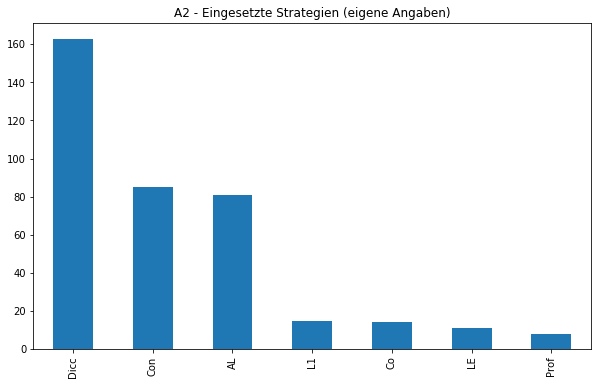

In [77]:
v.sort_values(ascending = False).plot(kind = 'bar', 
                                      title = 'A2 - Eingesetzte Strategien (eigene Angaben)',
                                     figsize = (10,6));

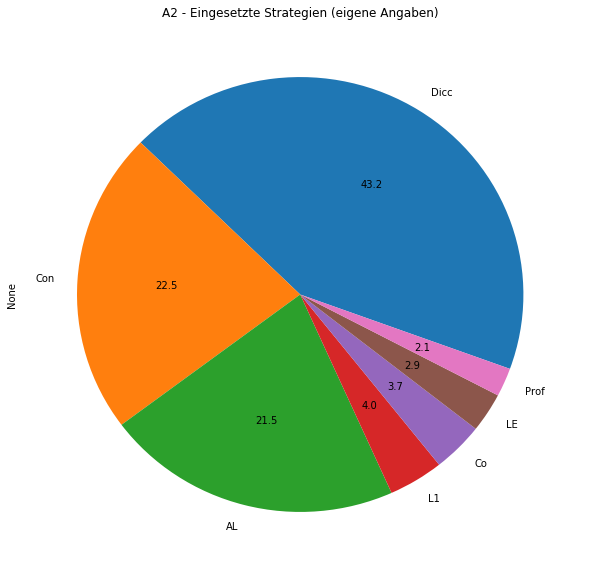

In [78]:
v.sort_values(ascending = False).plot(kind = 'pie', 
                                      title = 'A2 - Eingesetzte Strategien (eigene Angaben)', 
                                      figsize = (10,10),
                                      autopct='%.1f', startangle = -20);

#### Kreuztabelle Studenten - verwendete Strategien (A2)

In [79]:
CTA2 = pd.crosstab(A2.ID_alumno, A2.Estrategia_1, margins = True)

CTA2_2 = pd.crosstab(A2.ID_alumno, A2.Estrategia_2, margins = True)

In [80]:
for val in CTA2_2.index:
    for col in CTA2_2.columns:
        if CTA2_2.loc[val,col]!=0:
            CTA2.loc[val,col] = CTA2.loc[val,col]+ CTA2_2.loc[val,col]

In [81]:
CTA2

Estrategia_1,AL,Co,Con,Dicc,L1,LE,Prof,All
ID_alumno,,,,,,,,
1,1,0,3,19,0,0,0,23
2,4,3,5,5,0,2,0,19
3,5,0,7,6,0,1,0,19
4,4,0,10,3,4,0,1,22
5,0,3,4,4,0,1,0,12
6,7,0,1,0,3,1,0,12
7,1,0,7,4,0,2,0,14
8,0,0,0,15,1,0,0,16
9,11,0,2,7,2,1,0,23


#### Biplot Studenten - verwendete Strategien (A2)

In [82]:
X = CTA2.values[:-1,:-1]
medias = X.mean(axis=0)
desv = X.std(axis=0)
X_st = (X-medias)/desv

In [83]:
dim = 7
alpha = 1
p = X.shape[1]
n = X.shape[0]

In [84]:
U, Sigma, VT = randomized_svd(X_st, n_components=dim,
                                      n_iter=5,
                                      random_state=None)

In [85]:
R = U.dot(np.diag(Sigma[:dim]))
C = np.transpose(VT).dot(np.diag(Sigma[:dim]))

sf = np.sum(np.power(X_st,2),axis=1)
cf = np.zeros((n,dim))
for k in range(0,dim):
    cf[:,k] = np.power(R[:,k],2)*100/sf
    
sc = np.sum(np.power(X_st,2),axis=0)
cc = np.zeros((p,dim))

for k in range(0,dim):
    cc[:,k] = np.power(C[:,k],2)*100/sc

R = R.dot(np.diag(np.power(Sigma,alpha)))
C = C.dot(np.diag(np.power(Sigma,1-alpha)))

sca = np.sum(np.power(R,2))/n
scb = np.sum(np.power(C,2))/p
scf = np.sqrt(np.sqrt(scb/sca))

R = R*scf
C = C/scf

##### Repräsentation der Elemente in den Dimensionen des Biplots

In [86]:
pd.DataFrame(cf, columns = ['Dim_'+str(el+1) for el in range(7)], index = CTA2.index[:-1])

,Dim_1,Dim_2,Dim_3,Dim_4,Dim_5,Dim_6,Dim_7
ID_alumno,,,,,,,
1,55.638531,0.473680,0.495541,15.785207,2.132420,16.311996,9.162625
2,0.010853,43.028987,11.243279,38.951244,1.579011,5.085270,0.101356
3,11.324768,5.233696,46.571126,0.001691,14.831519,6.079107,15.958094
4,22.192201,2.013733,20.836525,9.456401,45.446324,0.015518,0.039299
5,21.802663,13.856321,13.948733,21.197826,1.040282,0.441437,27.712738
6,57.367353,8.292671,19.708382,0.210345,6.081801,5.050026,3.289423
7,2.673535,5.811889,54.584211,19.930192,10.319927,5.410864,1.269383
8,25.522713,0.724673,21.649195,5.462764,0.063882,45.079671,1.497102
9,46.072373,17.150077,25.016669,0.301873,1.043666,1.355161,9.060181


In [87]:
pd.DataFrame(cc, columns = ['Dim_'+str(el+1) for el in range(7)], index = CTA2.columns[:-1])

,Dim_1,Dim_2,Dim_3,Dim_4,Dim_5,Dim_6,Dim_7
Estrategia_1,,,,,,,
AL,56.360089,8.377718,17.630973,1.578724,0.050138,12.348604,3.653755
Co,42.733997,30.379229,0.013709,4.898264,9.294330,9.519659,3.160812
Con,3.530487,0.000208,86.321652,4.483758,1.599102,3.117067,0.947726
Dicc,70.320551,8.954528,1.175884,3.412116,4.482218,2.076432,9.578269
L1,44.188307,4.281261,0.543233,2.951205,42.547468,4.813577,0.674948
LE,15.551747,30.335112,4.912537,44.177283,1.237640,2.638893,1.146788
Prof,0.262572,59.352150,0.508817,21.979089,15.004023,1.473835,1.419514


Interpretation:

Um beispielsweise eine gute Repräsentation von Strategie "AL" zu bekommen, müssen für eine Darstellung in 2 Dimensionen Dimension 1 und 2 gewählt werden. Für "L1" wären Dimension 3 und 6 geeignet.
(Für die Programmierung in Python ist zu beachten, dass "1" dem Wert "0" entspricht usw.)

###### Visualisierung des Biplots

Um die Ergebnisse des Biplots darzustellen, müssen Dimensionen gewählt werden (siehe oben), da nur 2 (oder maximal 3) Dimensionen in Grafiken erfasst werden können.

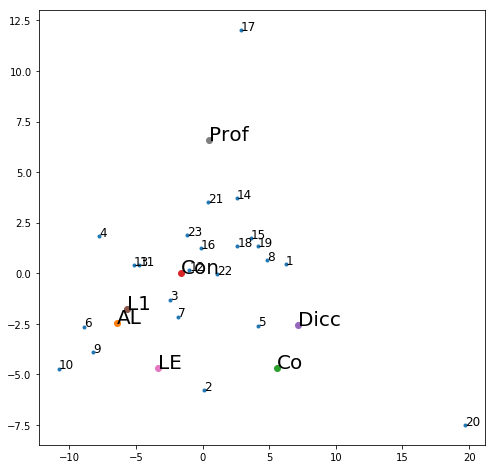

In [88]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)

ax1.scatter(R[:,0],R[:,1], s = 9)
for i in range(R.shape[0]):
    ax1.text(R[i,0],R[i,1], str(CTA2.index[:-1][i]), fontsize=12 )
for i in range(C.shape[0]):
    #ax1.arrow(0,0,C[i,0],C[i,1])
    ax1.scatter(C[i,0],C[i,1])
    ax1.text(C[i,0],C[i,1],CTA2.columns[:-1][i],fontsize=20)
    
plt.show()

##### Cluster

Mit den Werten der Kreuztabelle können auch Cluster berechnet werden, um Gruppen differenzieren zu können.

Diese können in der Folge in einer Grafik mit den Ergebnissen des Biplots dargestellt werden.

In [89]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
ward = AgglomerativeClustering(n_clusters=5).fit(X)

Beide Berechnungsarten führen zu ähnlichen Ergebnissen, in der Folge wird "ward" verwendet.

Test mit unterschiedlicher Anzahl an Clustern zeigen, dass 5 sinnvolle Ergebnisse liefert. (Diese Annahme sollte noch weiter überprüft werden, durch inhaltliche Interpretation der Elemente und ihrer Repräsentation.)

##### Darstellung Biplot + Cluster

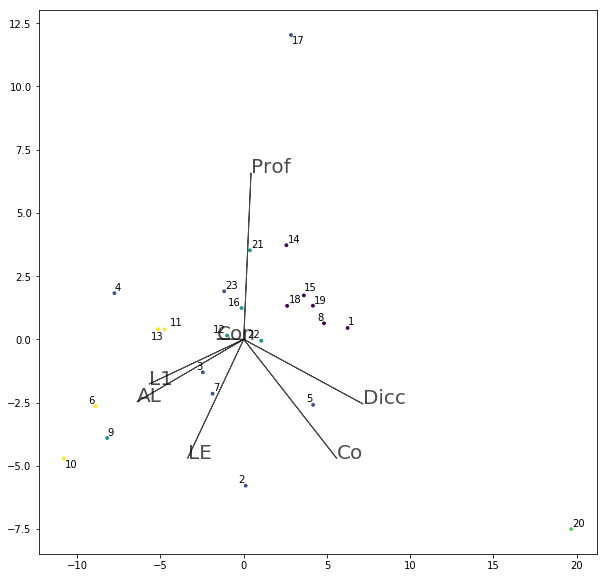

In [90]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

for i in range(C.shape[0]):
    ax.arrow(0,0,C[i,0],C[i,1], alpha = 0.7)
    #ax.scatter(C[i,0],C[i,1]) # Hier würden Linien nicht angezeigt.
    ax.text(C[i,0],C[i,1],CTA2.columns[:-1][i],fontsize=20, alpha = 0.7)

ax.scatter(R[:,0],R[:,1], s = 8, c = ward.labels_)
texts = [plt.text(R[i,0],R[i,1], CTA2.index[:-1][i], ha='center', va='center') for i in range(len(R[:,0]))]
adjust_text(texts);

#### Kreuztabelle Wörter - verwendete Strategien (A2)

In [91]:
Pal_Es_A2 = pd.crosstab(A2.Palabra, A2.Estrategia_1, margins = True)
Pal_Es_A2_2 = pd.crosstab(A2.Palabra, A2.Estrategia_2, margins = True)

In [92]:
for val in Pal_Es_A2_2.index:
    for col in Pal_Es_A2_2.columns:
        if Pal_Es_A2_2.loc[val,col]!=0:
            Pal_Es_A2.loc[val,col] = Pal_Es_A2.loc[val,col]+ Pal_Es_A2_2.loc[val,col]

In [93]:
Pal_Es_A2.sort_values(['All'], ascending=[0])

Estrategia_1,AL,Co,Con,Dicc,L1,LE,Prof,All
Palabra,,,,,,,,
All,81,14,85,163,15,11,8,377
Speditionsunternehmen,8,0,5,5,2,1,0,21
Eiszeit,10,0,2,6,0,1,0,19
Wissenschaft,8,0,2,9,0,0,0,19
Sorgen,1,1,2,10,0,0,2,16
bloß,0,0,4,10,0,0,2,16
Klimawandel,1,0,8,2,3,0,0,14
Zeitraum,5,0,5,3,0,0,0,13
Zukunft,0,0,2,9,1,0,1,13


In dieser Kreuztabelle werden als neu identifizierte Wörter mit den angegebenen Strategien in absteigender Frequenz dargestellt.

#### Biplot Wörter - verwendete Strategien (A2)

In [94]:
X = Pal_Es_A2.values[:-1,:-1]
medias = X.mean(axis=0)
desv = X.std(axis=0)
X_st = (X-medias)/desv

dim = 7
alpha = 1
p = X.shape[1]
n = X.shape[0]

U, Sigma, VT = randomized_svd(X_st, n_components=dim,
                                      n_iter=5,
                                      random_state=None)

R = U.dot(np.diag(Sigma[:dim]))
C = np.transpose(VT).dot(np.diag(Sigma[:dim]))

sf = np.sum(np.power(X_st,2),axis=1)
cf = np.zeros((n,dim))
for k in range(0,dim):
    cf[:,k] = np.power(R[:,k],2)*100/sf
    
sc = np.sum(np.power(X_st,2),axis=0)
cc = np.zeros((p,dim))

for k in range(0,dim):
    cc[:,k] = np.power(C[:,k],2)*100/sc

R = R.dot(np.diag(np.power(Sigma,alpha)))
C = C.dot(np.diag(np.power(Sigma,1-alpha)))

sca = np.sum(np.power(R,2))/n
scb = np.sum(np.power(C,2))/p
scf = np.sqrt(np.sqrt(scb/sca))

R = R*scf
C = C/scf

##### Cluster

In [95]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
ward = AgglomerativeClustering(n_clusters=4).fit(X)

Beide Berechnungsarten führen zu ähnlichen Ergebnissen, in der Folge wird "ward" verwendet.

##### Darstellung Biplot + Cluster

In [96]:
def vector_to_color(v):
    col = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    return [col[el] for el in v]

In [97]:
colors = vector_to_color(ward.labels_)

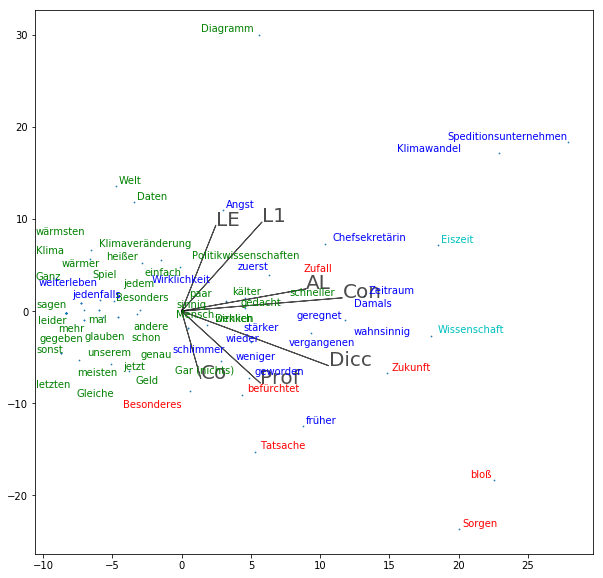

In [98]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

for i in range(C.shape[0]):
    ax.arrow(0,0,C[i,0],C[i,1], alpha = 0.7)
    #ax.scatter(C[i,0],C[i,1])
    ax.text(C[i,0],C[i,1],Pal_Es_A2.columns[:-1][i],fontsize=20, alpha = 0.7)

ax.scatter(R[:,0],R[:,1], s = 0.5)
texts = [plt.text(R[i,0],R[i,1], Pal_Es_A2.index[:-1][i], ha='center', va='center', color= colors[i]) for i in range(len(R[:,0]))]
adjust_text(texts);

### Gruppe B2

13 Teilnehmer

(9 hatten an Online-Befragung teilgenommen, 3 nicht, 1 keine Angabe)

3 Teilnehmer (ID 37-39) haben sich nur teilweise während des für die Aufgabe vorgesehenen Zeitraums mit dieser beschäftigt. Aus diesem Grund konnten sie weniger Wörter und Strategien angeben.

In [227]:
#B2_1 = B2.drop(data.index[514:563]) # Gezielt bestimmte Zeilen entfernen. (Muss dafür Zeilennummer kennen - und darf diese später nicht ändern.)
B2_1 = B2[(B2.ID_alumno != 37) & (B2.ID_alumno != 38) & (B2.ID_alumno != 39)].reset_index(drop = True)

Für manche Berechnungen kann es sinnvoll sein, diese TN unberücksichtigt zu lassen, in diesem Fall kann "B2_1" verwendet werden.

In [228]:
print(r'Teilnehmer: ' + str(len(B2.ID_alumno.unique()))+'\n'+
      r'TN + Online-Befragung: ' + str(len(B2[B2.Encuesta == 1].ID_alumno.unique()))+'\n'+
      r'TN - Online-Befragung: ' + str(len(B2[B2.Encuesta == 2].ID_alumno.unique())))

Teilnehmer: 13
TN + Online-Befragung: 9
TN - Online-Befragung: 3


#### Als "neu" identifizierte Wörter

In [229]:
len(B2.Palabra.unique())

71

In [230]:
B2.Palabra.value_counts()

Wohlstand               11
Hautaufhellung          11
Oberweite                9
Gesellschaftsschicht     9
Rundungen                9
Ähnlich                  9
Maßstab                  9
erstrebenswert           9
üppige                   9
blass                    8
Schlanksein              8
kräftig                  8
belastbar                8
Hautton                  8
Hinweis                  8
Fortschritt              7
Hautfarbe                7
wesentlich               7
gilt                     6
abhängig                 5
vornehm                  5
glätten                  4
daheim                   4
Sonnenschirm             4
Bevölkerung              4
verfügt                  4
wohlhabenden             4
jeweilige                3
speisen                  3
nachzuhelfen             3
                        ..
Kleingeld                2
Erfolg                   2
umgekehrt                2
Dicke                    2
früheren                 2
Hilfsmittel              2
F

Ein Wort konnte nicht entziffert werden (Schrift schwer lesbar) und ist mit "?" angegeben.

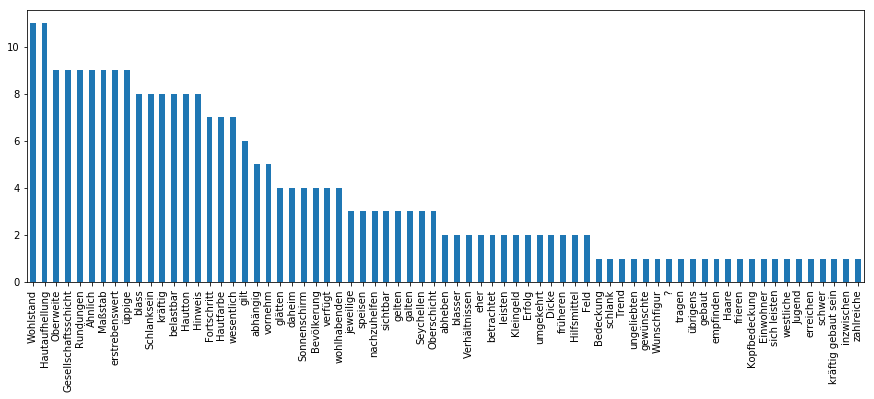

In [231]:
B2.Palabra.value_counts().plot(kind = 'bar', figsize = (15,5));

#### Kreuztabelle Studenten - neue Wörter (B2)

In [242]:
Al_Pal_B2 = pd.crosstab(B2.ID_alumno, B2.Palabra, margins = True)
Al_Pal_B2_1 = pd.crosstab(B2_1.ID_alumno, B2_1.Palabra, margins = True)

In [233]:
Al_Pal_B2.T.head()

ID_alumno,31,32,33,34,35,36,37,38,39,40,41,42,43,All
Palabra,,,,,,,,,,,,,,
?,0,0,0,0,0,1,0,0,0,0,0,0,0,1
Bedeckung,0,0,0,0,0,0,0,1,0,0,0,0,0,1
Bevölkerung,0,0,0,1,1,0,0,0,0,1,0,0,1,4
Dicke,0,0,0,0,0,0,0,1,1,0,0,0,0,2
Einwohner,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [234]:
print(r'Durchschnittlich als "neu" identifizierte Wortanzahl: '+str(Al_Pal_B2['All'][:-1].mean()))

Durchschnittlich als "neu" identifizierte Wortanzahl: 20.53846153846154


In [235]:
print(r'Minimum der als "neu" identifizierten Wörter: '+str(B2.ID_alumno.value_counts().min()) + '\n' +
      r'Maximum der als "neu" identifizierten Wörter: '+str(B2.ID_alumno.value_counts().max()))

Minimum der als "neu" identifizierten Wörter: 13
Maximum der als "neu" identifizierten Wörter: 34


Durchschnittlich wurden ca. 20,5 Wörter pro Person als "neu" identifiziert, ca. 22, wenn die "langsamen" TN unberücksichtigt bleiben. Schwankungsbreite: zwischen 13 und 34.

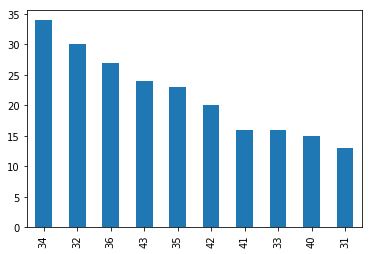

In [236]:
B2_1.ID_alumno.value_counts().plot(kind = 'bar');

##### Histogramm

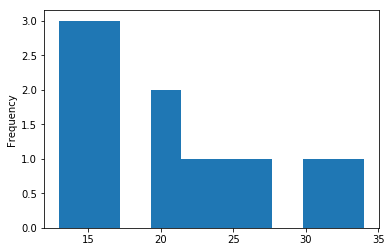

In [237]:
B2.ID_alumno.value_counts().plot(kind = 'hist',
                                bins = 10);

#### Einsatz von Erschließungsstrategien (B2)

* L1 = Descubro el significado o la función de palabras nuevas en alemán gracias a mi lengua materna. (Ich erschließe die Bedeutung oder Funktion unbekannter deutscher Wörter mit Hilfe meiner Muttersprache.)
* LE = Descubro el significado o la función de palabras nuevas en alemán con la ayuda de otras lenguas. (Ich erschließe unbekannte Wörter mit Hilfe anderer Sprachen.)
* AL = Utilizo mis conocimientos de alemán, p. ej. otras palabras conocidas, clases de palabras o la formación de palabras compuestas. (Ich nutze mein Wissen über das Deutsche, z.B. andere bekannte Wörter, Wortarten oder Kompositabildung.)
* Con = Utilizo información extraída del contexto, p. ej. la posición de una palabra en la frase o el formato del texto. (Ich nutze Informationen aus dem Kontext, z.B. die Position eines Wortes im Satz oder die Gestaltung des Textes.)
* Prof = Pido ayuda a mi profesor/a. (Ich bitte meinen Lehrer/meine Lehrerin um Hilfe.)
* Co = Pido ayuda a mis compañeros/as de clase. (Ich bitte die anderen Kursteilnehmer/innen um Hilfe.)
* Dicc = Consulto un diccionario u otra fuente (en papel o digital). (Ich konsultiere ein Wörterbuch oder eine andere Quelle (Printversion oder digital).)

In [238]:
w1 = B2.Estrategia_1.value_counts()
w2 = B2.Estrategia_2.value_counts()
w = w1 + w2
w['LE'] = w1['LE']
w['Prof'] = w1['Prof']

In [239]:
w.sort_values(ascending = False)

Dicc    125.0
AL       63.0
Con      52.0
Co       15.0
L1        4.0
Prof      3.0
LE        1.0
dtype: float64

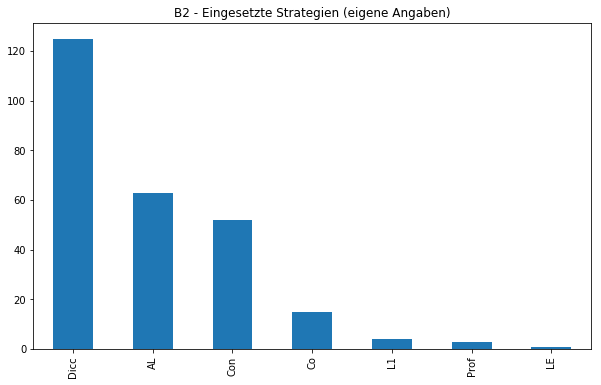

In [240]:
w.sort_values(ascending = False).plot(kind = 'bar', 
                                      title = 'B2 - Eingesetzte Strategien (eigene Angaben)',
                                     figsize = (10,6));

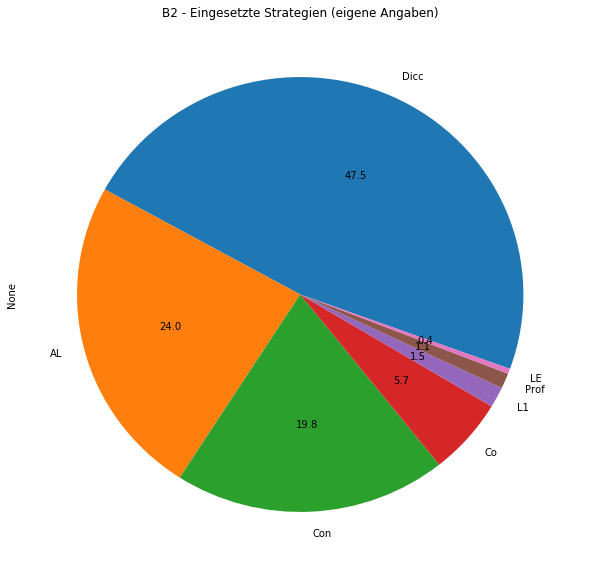

In [241]:
w.sort_values(ascending = False).plot(kind = 'pie', 
                                      title = 'B2 - Eingesetzte Strategien (eigene Angaben)', 
                                      figsize = (10,10),
                                      autopct='%.1f', startangle = -20);

#### Kreuztabelle Studenten - verwendete Strategien (B2)

In [245]:
CTB2 = pd.crosstab(B2.ID_alumno, B2.Estrategia_1, margins = True)
CTB2_2 = pd.crosstab(B2.ID_alumno, B2.Estrategia_2, margins = True)

In [246]:
for val in CTB2_2.index:
    for col in CTB2_2.columns:
        if CTB2_2.loc[val,col]!=0:
            CTB2.loc[val,col] = CTB2.loc[val,col]+ CTB2_2.loc[val,col]

In [251]:
CTB2

Estrategia_1,AL,Co,Con,Dicc,L1,LE,Prof,All
ID_alumno,,,,,,,,
31,4,2,7,5,2,0,0,20
32,7,0,12,12,0,0,1,32
33,1,1,2,11,0,1,0,16
34,8,5,9,19,0,0,0,41
35,4,3,1,16,0,0,0,24
36,4,0,1,13,0,0,1,19
37,2,0,0,7,0,0,0,9
38,4,0,5,0,0,0,0,9
39,3,0,1,2,1,0,0,7


#### Biplot Studenten - verwendete Strategien (B2)

In [248]:
X = CTB2.values[:-1,:-1]
medias = X.mean(axis=0)
desv = X.std(axis=0)
X_st = (X-medias)/desv

dim = 7
alpha = 1
p = X.shape[1]
n = X.shape[0]

U, Sigma, VT = randomized_svd(X_st, n_components=dim,
                                      n_iter=5,
                                      random_state=None)

R = U.dot(np.diag(Sigma[:dim]))
C = np.transpose(VT).dot(np.diag(Sigma[:dim]))

sf = np.sum(np.power(X_st,2),axis=1)
cf = np.zeros((n,dim))
for k in range(0,dim):
    cf[:,k] = np.power(R[:,k],2)*100/sf
    
sc = np.sum(np.power(X_st,2),axis=0)
cc = np.zeros((p,dim))

for k in range(0,dim):
    cc[:,k] = np.power(C[:,k],2)*100/sc

R = R.dot(np.diag(np.power(Sigma,alpha)))
C = C.dot(np.diag(np.power(Sigma,1-alpha)))

sca = np.sum(np.power(R,2))/n
scb = np.sum(np.power(C,2))/p
scf = np.sqrt(np.sqrt(scb/sca))

R = R*scf
C = C/scf

Man könnte auch im Fall der Gruppe B2 die Repräsentation der Elemente in den Dimensionen des Biplots untersuchen.

##### Cluster

In [252]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
ward = AgglomerativeClustering(n_clusters=4).fit(X)

Die Annahme, dass 4 Gruppen gebildet werden können, muss noch überprüft werden.

##### Darstellung Biplot + Cluster

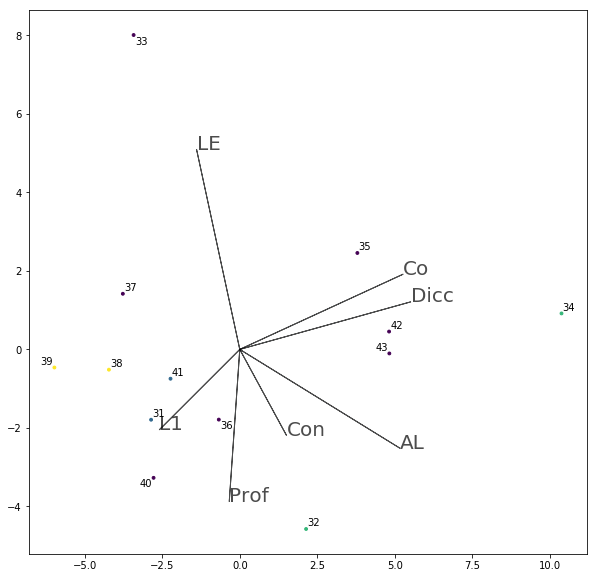

In [253]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

for i in range(C.shape[0]):
    ax.arrow(0,0,C[i,0],C[i,1], alpha = 0.7)
    #ax.scatter(C[i,0],C[i,1]) # Hier würden Linien nicht angezeigt.
    ax.text(C[i,0],C[i,1],CTA2.columns[:-1][i],fontsize=20, alpha = 0.7)

ax.scatter(R[:,0],R[:,1], s = 8, c = ward.labels_)
texts = [plt.text(R[i,0],R[i,1], CTB2.index[:-1][i], ha='center', va='center') for i in range(len(R[:,0]))]
adjust_text(texts);

#### Kreuztabelle Wörter - verwendete Strategien (B2)

In [254]:
Pal_Es_B2 = pd.crosstab(B2.Palabra, B2.Estrategia_1, margins = True)
Pal_Es_B2_2 = pd.crosstab(B2.Palabra, B2.Estrategia_2, margins = True)

In [255]:
for val in Pal_Es_B2_2.index:
    for col in Pal_Es_B2_2.columns:
        if Pal_Es_B2_2.loc[val,col]!=0:
            Pal_Es_B2.loc[val,col] = Pal_Es_B2.loc[val,col]+ Pal_Es_B2_2.loc[val,col]

In [256]:
Pal_Es_B2.sort_values(['All'], ascending=[0])

Estrategia_1,AL,Co,Con,Dicc,L1,LE,Prof,All
Palabra,,,,,,,,
All,63,15,52,125,4,1,3,263
Wohlstand,6,1,1,5,0,0,0,13
Hautaufhellung,8,2,3,0,0,0,0,13
Rundungen,2,0,2,5,3,0,0,12
Hautton,8,1,1,2,0,0,0,12
Gesellschaftsschicht,4,1,1,5,0,0,0,11
üppige,0,0,2,7,0,0,1,10
Hautfarbe,6,0,3,1,0,0,0,10
Oberweite,0,2,2,4,0,0,0,8


#### Biplot Wörter - verwendete Strategien (B2)

In [257]:
X = Pal_Es_B2.values[:-1,:-1]
medias = X.mean(axis=0)
desv = X.std(axis=0)
X_st = (X-medias)/desv

dim = 7
alpha = 1
p = X.shape[1]
n = X.shape[0]

U, Sigma, VT = randomized_svd(X_st, n_components=dim,
                                      n_iter=5,
                                      random_state=None)

R = U.dot(np.diag(Sigma[:dim]))
C = np.transpose(VT).dot(np.diag(Sigma[:dim]))

sf = np.sum(np.power(X_st,2),axis=1)
cf = np.zeros((n,dim))
for k in range(0,dim):
    cf[:,k] = np.power(R[:,k],2)*100/sf
    
sc = np.sum(np.power(X_st,2),axis=0)
cc = np.zeros((p,dim))

for k in range(0,dim):
    cc[:,k] = np.power(C[:,k],2)*100/sc

R = R.dot(np.diag(np.power(Sigma,alpha)))
C = C.dot(np.diag(np.power(Sigma,1-alpha)))

sca = np.sum(np.power(R,2))/n
scb = np.sum(np.power(C,2))/p
scf = np.sqrt(np.sqrt(scb/sca))

R = R*scf
C = C/scf

##### Cluster

In [268]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
ward = AgglomerativeClustering(n_clusters=5).fit(X)

Eventuell können statt 5 auch nur 4 unterschiedliche Gruppen angenommen werden.

##### Darstellung Biplot + Cluster

In [271]:
colors = vector_to_color(ward.labels_)

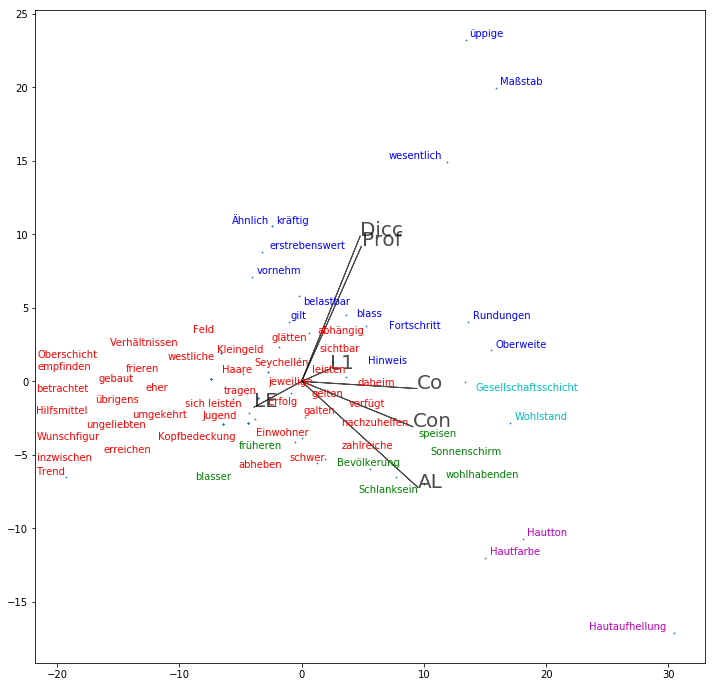

In [272]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

for i in range(C.shape[0]):
    ax.arrow(0,0,C[i,0],C[i,1], alpha = 0.7)
    #ax.scatter(C[i,0],C[i,1])
    ax.text(C[i,0],C[i,1],Pal_Es_B2.columns[:-1][i],fontsize=20, alpha = 0.7)

ax.scatter(R[:,0],R[:,1], s = 0.5)
texts = [plt.text(R[i,0],R[i,1], Pal_Es_B2.index[:-1][i], ha='center', va='center', color=colors[i]) for i in range(len(R[:,0]))]
adjust_text(texts);